# Import potrzebnych biblotek 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pyedflib 
import pandas as pd
import mne


# Ułożenie elektrod na głowie 

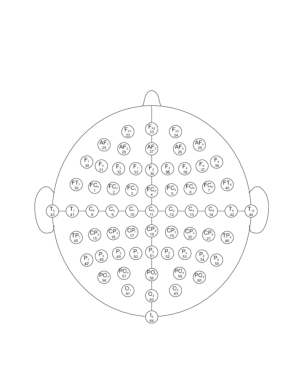

In [31]:
#show the 64 channel montage
img = plt.imread('files/64_channel_sharbrough-old.png')
plt.imshow(img)
plt.axis('off')
plt.show()


# conversion data type form .edf to data frame

In [57]:
subject = 1
file = 5
fileName = f"files/S{subject:03d}/S{subject:03d}R{file:02d}.edf"


def file_to_DataDrame(path):
    """
    This function takes in a file path and returns a dataframe with the data and the target values
    format:
        Fc5	        Fc3	        Fc1	        ...	Oz	        O2	        Iz	        target
    0	-0.000046	-0.000041	-0.000032	...	0.000040	0.000108	0.000055	T0
    1	-0.000054	-0.000048	-0.000034	...	0.000064	0.000114	0.000074	T0
    ...
    """

    reader = mne.io.read_raw_edf(path, preload=True)
    annotations = reader.annotations  # get the values of the annotations
    codes = annotations.description  # get the codes from the annotations

    df = pd.DataFrame(
        reader.get_data().T,
        columns=[channel.replace(".", "") for channel in reader.ch_names],
    )  # transpose the data to get the right shape
    df = df[~(df == 0).all(axis=1)]  # remove rows with all zeros
    timeArray = np.array(
        [round(x, 10) for x in np.arange(0, len(df) / 160, 0.00625)]
    )  # create an array of time values

    codeArray = []
    counter = 0
    for timeVal in timeArray:
        if (
            timeVal in annotations.onset
        ):  # if the time value is in the onset array, add the corresponding code to the codeArray
            counter += 1
        code_of_target = int(
            codes[counter - 1].replace("T", "")
        )  # convert T0 to 0, T1 to 1, etc
        codeArray.append(code_of_target)

    df["target"] = np.array(codeArray).T
    return df

In [58]:
df = file_to_DataDrame(fileName)

Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [62]:
df.head(2)


,Fc5,Fc3,Fc1,Fcz,Fc2,Fc4,Fc6,C5,C3,C1,...,Po7,Po3,Poz,Po4,Po8,O1,Oz,O2,Iz,target
0,-0.00001,0.00002,0.000007,-0.000018,0.000000,0.000004,0.000060,0.000004,0.000012,0.000006,...,0.000030,0.000025,0.000022,0.000013,-0.000009,0.00002,0.000024,0.000089,0.000068,0
1,0.00001,0.00005,0.000049,0.000022,0.000038,0.000031,0.000084,0.000025,0.000043,0.000049,...,0.000044,0.000031,0.000027,0.000025,0.000012,0.00003,0.000025,0.000083,0.000065,0


In [64]:
df.tail(2)

,Fc5,Fc3,Fc1,Fcz,Fc2,Fc4,Fc6,C5,C3,C1,...,Po7,Po3,Poz,Po4,Po8,O1,Oz,O2,Iz,target
19918,-0.000024,-0.000005,-0.00002,-0.000017,-0.000021,-0.000025,-0.000039,0.000001,-0.000011,-0.000012,...,-0.000030,-0.000015,0.000001,0.000019,0.000033,0.000001,0.000016,0.000026,0.000002,1
19919,-0.000032,-0.000029,-0.00004,-0.000027,-0.000030,-0.000031,-0.000049,-0.000015,-0.000027,-0.000027,...,-0.000004,0.000008,0.000018,0.000035,0.000048,-0.000019,0.000002,0.000011,-0.000015,1


In [65]:
# check presiction data type
print(f"data presiction in df:\t {df.iloc[0,0].dtype}")
a = df.iloc[1].values  # get the first row of the dataframe
a = a[:-1]  # remove the target value
a = a.astype(np.float64)  # convert the values to float
print(f"class type of a:\t {type(np.array(a))}")
print(f"schape of a:\t\t {a.shape}")
print(f"data presiction in a:\t {a.dtype}")
print(a)

data presiction in df:	 float64
class type of a:	 <class 'numpy.ndarray'>
schape of a:		 (64,)
data presiction in a:	 float64
[ 1.0e-05  5.0e-05  4.9e-05  2.2e-05  3.8e-05  3.1e-05  8.4e-05  2.5e-05
  4.3e-05  4.9e-05  4.2e-05  2.2e-05  3.1e-05  4.1e-05  4.5e-05  4.1e-05
  4.8e-05  5.2e-05  3.6e-05  3.7e-05  1.0e-05 -6.7e-05 -4.4e-05 -7.0e-05
 -3.1e-05 -3.2e-05  2.3e-05 -2.0e-06 -4.4e-05  5.3e-05  2.5e-05  3.8e-05
  3.9e-05  4.4e-05  2.5e-05  2.1e-05 -2.5e-05 -8.0e-06  4.6e-05  9.1e-05
  5.7e-05  3.1e-05  2.5e-05 -1.0e-05  2.2e-05  3.7e-05  3.5e-05  4.0e-05
  3.6e-05  2.9e-05  3.7e-05  2.2e-05  2.1e-05  1.2e-05  1.0e-06  4.4e-05
  3.1e-05  2.7e-05  2.5e-05  1.2e-05  3.0e-05  2.5e-05  8.3e-05  6.5e-05]


# Create a new dataframe with the selected ekperiment numbers

In [77]:
#create a new dataframe with num of ecperiments 3,4,7,8,11,12
choose_num_of_exp = [3,4,7,8,11,12]
# person = renage (1,109)
person = 1

#conect all experiments to one dataframe np.array 6x20000x64x1 
all_meseurments = np.array(6,20000,64,1)
for i in range(6):
    fileName = f"files/S{person:03d}/S{person:03d}R{choose_num_of_exp[i]:02d}.edf"
    df = file_to_DataDrame(fileName)
    all_meseurments[i] = df.values

Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001

,Fc5,Fc3,Fc1,Fcz,Fc2,Fc4,Fc6,C5,C3,C1,...,Po7,Po3,Poz,Po4,Po8,O1,Oz,O2,Iz,target
0,-0.000017,-0.000030,-0.000037,-0.000057,-0.000067,-0.000084,-0.000057,-0.000006,-0.000032,-0.000035,...,-0.000016,-0.000015,-0.000006,-0.000010,0.000018,-0.000022,-0.000004,-0.000077,-0.000051,0
1,-0.000005,-0.000014,-0.000022,-0.000040,-0.000048,-0.000068,-0.000052,0.000007,-0.000021,-0.000023,...,-0.000007,-0.000007,-0.000004,-0.000011,0.000019,-0.000025,-0.000013,-0.000081,-0.000058,0
2,-0.000003,-0.000010,-0.000009,-0.000024,-0.000026,-0.000052,-0.000036,0.000010,-0.000019,-0.000020,...,-0.000005,-0.000008,-0.000006,-0.000018,0.000014,-0.000019,-0.000010,-0.000082,-0.000056,0
3,0.000002,-0.000008,-0.000001,-0.000005,-0.000008,-0.000035,-0.000024,0.000016,-0.000013,-0.000015,...,0.000020,0.000016,0.000026,0.000020,0.000056,0.000000,0.000012,-0.000059,-0.000032,0
4,0.000012,-0.000003,0.000004,0.000015,0.000012,-0.000014,-0.000005,0.000021,-0.000011,-0.000010,...,0.000033,0.000025,0.000027,0.000027,0.000065,0.000024,0.000038,-0.000031,0.000003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378475,0.000062,0.000067,0.000073,0.000081,0.000072,0.000067,0.000060,0.000004,0.000018,0.000021,...,-0.000046,-0.000058,-0.000083,-0.000039,-0.000018,-0.000089,-0.000084,-0.000089,-0.000076,2
378476,0.000036,0.000040,0.000042,0.000050,0.000044,0.000046,0.000045,-0.000004,0.000007,0.000003,...,-0.000023,-0.000036,-0.000059,-0.000017,0.000001,-0.000076,-0.000070,-0.000077,-0.000063,2
378477,0.000048,0.000049,0.000045,0.000057,0.000057,0.000059,0.000057,0.000017,0.000023,0.000017,...,-0.000016,-0.000032,-0.000052,-0.000022,-0.000016,-0.000052,-0.000046,-0.000063,-0.000043,2
378478,0.000039,0.000030,0.000023,0.000031,0.000036,0.000037,0.000038,0.000004,0.000007,-0.000002,...,-0.000020,-0.000032,-0.000043,-0.000025,-0.000017,-0.000036,-0.000030,-0.000059,-0.000031,2


In [78]:
#create a new dataframe with num of ecperiments 3,4,7,8,11,12
choose_num_of_exp = [3,4,7,8,11,12]
# person = renage (1,109)
person = 1
array_measurement = np.zeros((64,1))
all_measurements = np.zeros((len(choose_num_of_exp),64,1))
for i in choose_num_of_exp:
    fileName = f'files/S{person:03d}/S{person:03d}R{i:02d}.edf'
    df = file_to_DataDrame(fileName)
    array_measurement = np.array(df.iloc[i].values[:-1], dtype=np.float64) #get the first row of the dataframe and remove the target value and convert the values to np.array
    array_target = np.array(df.iloc[i].values[-1])  #get the target value
    array_measurement_target = np.append(array_measurement, [array_target], axis=0)
    print(array_measurement_target.shape)

person = 1
all_measurements = []

for i in choose_num_of_exp:
    fileName = f'files/S{person:03d}/S{person:03d}R{i:02d}.edf'
    df = file_to_DataDrame(fileName)
    array_measurement = np.array(df.iloc[i].values[:-1], dtype=np.float64)
    array_target = np.array(df.iloc[i].values[-1])
    array_measurement_target = np.append(array_measurement, [array_target], axis=0)
    print(array_measurement_target.shape)
    all_measurements.append(array_measurement_target)

# Convert list of numpy arrays back to numpy array
# all_measurements = np.array(all_measurements), [array_measurement_target], axis=0)
    
    


Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
(65,)
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
(65,)
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
(65,)
Extracting EDF parameters from /home/daniel/repos/Decoding_of_EEG/files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
(65,)
Extracting EDF parameters from /home/daniel/repos/De

In [82]:
print(df['Fc5'][1])
print(df.head(2))

-4.9999999999999996e-06
        Fc5       Fc3       Fc1       Fcz       Fc2       Fc4       Fc6  \
0 -0.000017 -0.000030 -0.000037 -0.000057 -0.000067 -0.000084 -0.000057   
1 -0.000005 -0.000014 -0.000022 -0.000040 -0.000048 -0.000068 -0.000052   

         C5        C3        C1  ...       Po7       Po3       Poz       Po4  \
0 -0.000006 -0.000032 -0.000035  ... -0.000016 -0.000015 -0.000006 -0.000010   
1  0.000007 -0.000021 -0.000023  ... -0.000007 -0.000007 -0.000004 -0.000011   

        Po8        O1        Oz        O2        Iz  target  
0  0.000018 -0.000022 -0.000004 -0.000077 -0.000051       0  
1  0.000019 -0.000025 -0.000013 -0.000081 -0.000058       0  

[2 rows x 65 columns]


In [83]:
print(df.tail(2))

            Fc5       Fc3       Fc1       Fcz       Fc2       Fc4       Fc6  \
19918  0.000039  0.000030  0.000023  0.000031  0.000036  0.000037  0.000038   
19919  0.000040  0.000026  0.000024  0.000023  0.000027  0.000023  0.000012   

             C5        C3        C1  ...       Po7       Po3       Poz  \
19918  0.000004  0.000007 -0.000002  ... -0.000020 -0.000032 -0.000043   
19919  0.000008  0.000007  0.000005  ...  0.000001 -0.000007 -0.000010   

            Po4       Po8        O1        Oz        O2        Iz  target  
19918 -0.000025 -0.000017 -0.000036 -0.000030 -0.000059 -0.000031       2  
19919  0.000002  0.000012 -0.000017 -0.000006 -0.000041 -0.000012       2  

[2 rows x 65 columns]


In [84]:
# Start T0 or T1 or T2 
def index_of_TX(df):
    key = 0
    dict_TX_index = {key: [df['target'][0], 0] }
    current_TX = df['target'][0]
    for i in range(len(df['target'])):
        if df['target'][i] != current_TX:
            key += 1
            dict_TX_index[key] = [df['target'][i], i]
            current_TX = df['target'][i]
 
    return dict_TX_index
   
        
print(index_of_TX(df))

{0: [0, 0], 1: [2, 672], 2: [0, 1328], 3: [1, 2000], 4: [0, 2656], 5: [2, 3328], 6: [0, 3984], 7: [1, 4656], 8: [0, 5312], 9: [1, 5984], 10: [0, 6640], 11: [2, 7312], 12: [0, 7968], 13: [2, 8640], 14: [0, 9296], 15: [1, 9968], 16: [0, 10624], 17: [1, 11296], 18: [0, 11952], 19: [2, 12624], 20: [0, 13280], 21: [2, 13952], 22: [0, 14608], 23: [1, 15280], 24: [0, 15936], 25: [2, 16608], 26: [0, 17264], 27: [1, 17936], 28: [0, 18592], 29: [2, 19264]}


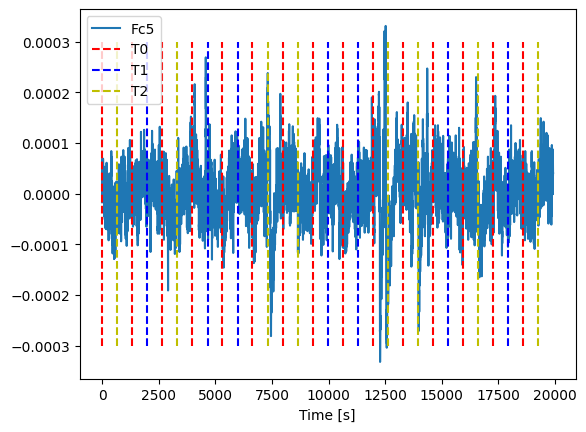

In [87]:
indexs = index_of_TX(df)
xT0=[]
xT1=[]
xT2=[]
ax= df.plot(y='Fc5')
ax.set_xlabel("Time [s]")
for i in range(0,len(indexs)):
    if indexs[i][0] == 0:
        xT0.append(indexs[i][1])      
    elif indexs[i][0] == 1:
        xT1.append(indexs[i][1])
    elif indexs[i][0] == 2:
        xT2.append(indexs[i][1])
#doter line
ax.vlines(x=xT0, ymin=-0.0003, ymax=0.0003, color='r',label='T0',linestyles='dashed')
ax.vlines(x=xT1, ymin=-0.0003, ymax=0.0003, color='b',label='T1',linestyles='dashed')
ax.vlines(x=xT2, ymin=-0.0003, ymax=0.0003, color='y',label='T2', linestyles='dashed')
ax.legend()



In [89]:
#
def normalize_data(df):
    df = (df - df.min()) / (df.max() - df.min())
    return df

In [92]:
df = normalize_data(df)

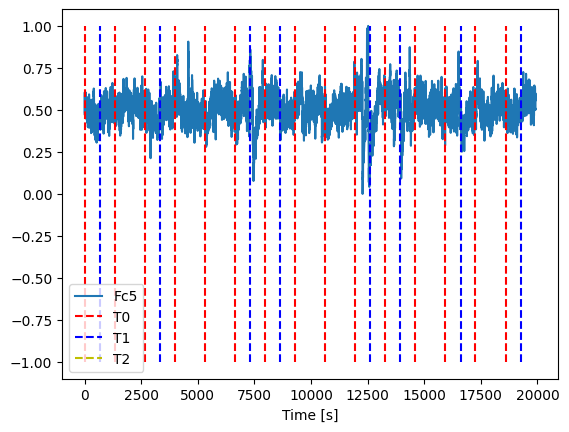

In [94]:
indexs = index_of_TX(df)
xT0=[]
xT1=[]
xT2=[]
ax= df.plot(y='Fc5')
ax.set_xlabel("Time [s]")
for i in range(0,len(indexs)):
    if indexs[i][0] == 0:
        xT0.append(indexs[i][1])      
    elif indexs[i][0] == 1:
        xT1.append(indexs[i][1])
    elif indexs[i][0] == 2:
        xT2.append(indexs[i][1])
#doter line
#max value
max_value = df['Fc5'].max()
ax.vlines(x=xT0, ymin=-0, ymax=max_value, color='r',label='T0',linestyles='dashed')
ax.vlines(x=xT1, ymin=-0, ymax=max_value, color='b',label='T1',linestyles='dashed')
ax.vlines(x=xT2, ymin=-0, ymax=max_value, color='y',label='T2', linestyles='dashed')
ax.legend()



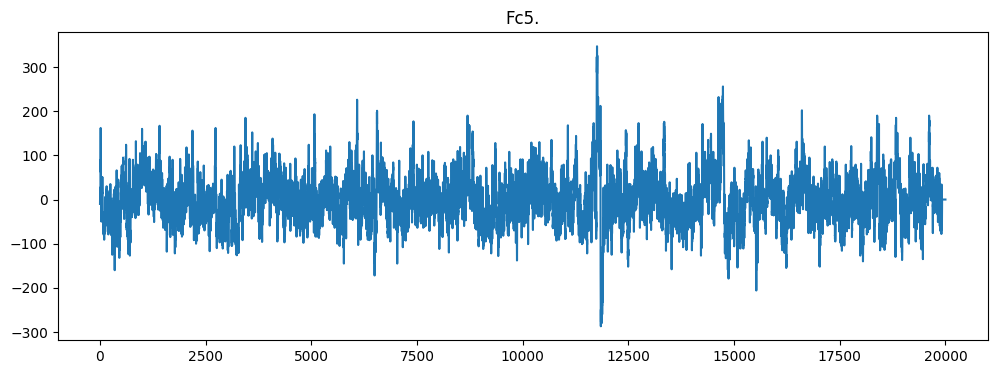

In [88]:
# Najpierw zainstaluj pyEDFlib, jeśli jeszcze tego nie zrobiłeś:
# !pip install pyedflib



# Zastąp 'path_to_edf_file.edf' ścieżką do Twojego pliku EDF
file_path = '/home/daniel/repos/Decoding_of_EEG/files/S001/S001R05.edf'

# Odczytanie pliku EDF
with pyedflib.EdfReader(file_path) as f:
    # Pobranie liczby sygnałów
    n = f.signals_in_file

    # Pobranie etykiet sygnałów
    signal_labels = f.getSignalLabels()

    signals = []
    # Odczytanie i wyplotowanie każdego sygnału
    for i in range(n):
        signal = f.readSignal(i)
        signals.append(signal)
        plt.figure(figsize=(12, 4))
        plt.plot(signal)
        plt.title(signal_labels[i])
        plt.show()
        if i < 1:
            break
    
    signals_array = np.array(signals)
    



In [ ]:
print(signal_labels)
signal= f.readSignal


['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


In [ ]:
print(signals)

[array([-10.,  10.,  17., ...,   0.,   0.,   0.])]


In [ ]:
print(np.max(signals_array))
print(np.min(signals_array))


347.0
-287.0
